In [1]:
import keras
from keras.datasets import boston_housing
from keras.layers import Activation, Dense, Dropout, Input
from keras.models import Sequential, Model
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [75]:
batch_size = 8
epochs = 200
folds = 10

In [76]:
class BostonRegressionModel(keras.Model):
    def __init__(self):
        super(BostonRegressionModel, self).__init__(name='mlp')
        self.dense1 = Dense(512, activation='relu')
        self.dense2 = Dense(512, activation='relu')
        self.dense3 = Dense(1)
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
            
        return self.dense3(x)

In [77]:
models = [BostonRegressionModel() for i in range(folds)]

In [78]:
for model in models:
    model.compile(loss='mse',
                  optimizer=Adam(lr=0.0001),
                  metrics=['mse'])

In [79]:
kf = KFold(n_splits=folds)
fold = 0
history = []
for train, test in kf.split(x_train, y_train):
    print('Processing fold ', fold)
    history.append(models[fold].fit(x_train[train], y_train[train], 
                                    batch_size=batch_size, 
                                    epochs=epochs, 
                                    verbose=0, 
                                    validation_data=(x_train[test], y_train[test])))
    fold += 1

Processing fold  0
Processing fold  1
Processing fold  2
Processing fold  3
Processing fold  4
Processing fold  5
Processing fold  6
Processing fold  7
Processing fold  8
Processing fold  9


In [80]:
average_loss_hist = [i for i in history[0].history['loss']]
average_val_loss_hist = [i for i in history[0].history['val_loss']]

for i in range(1, len(history)):
    for j in range(epochs):
        average_loss_hist[j] += history[i].history['loss'][j]
        average_val_loss_hist[j] += history[i].history['val_loss'][j]
        
for j in range(epochs):
    average_loss_hist[j] /= folds
    average_val_loss_hist[j] /= folds

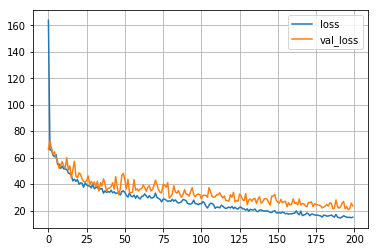

In [81]:
plt.plot(average_loss_hist, label='loss')
plt.plot(average_val_loss_hist, label='val_loss')
plt.legend()
plt.grid()

In [82]:
scores = [model.evaluate(x_test, y_test, verbose=0) for model in models]
score = 0
for s in scores:
    score += s[0]
    
score /= folds

print('Test loss:', score)

Test loss: 30.077464750701306
